# Full Class Distribution Analysis

In [51]:
import numpy as np
from matplotlib import pyplot as plt
import math
from configs.scannet_constants import *
import pandas as pd
from IPython.display import display, HTML
%matplotlib inline

In [52]:
load = np.load("../../Downloads/class_dist_advanced.npy", allow_pickle='TRUE').item()

In [53]:
class_ids = list(load.keys())
class_vals = []
for key in load.keys():
    class_vals.append(load[key]["sum"])

## Quick Analysis

['Undefined', 'wall', 'floor', 'cabinet', 'bed', 'chair', 'sofa', 'table', 'door', 'window', 'bookshelf', 'picture', 'counter', 'desk', 'curtain', 'refrigerator', 'shower curtain', 'toilet', 'sink', 'bathtub', 'otherfurniture']


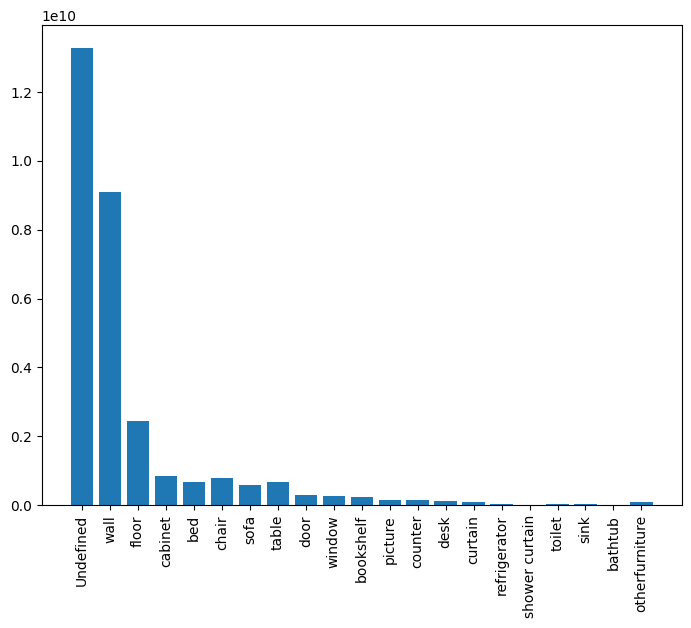

In [54]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
classes = list(tuple('i')+CLASS_LABELS_20)
classes[0]="Undefined"
print(classes)
plt.xticks(rotation='vertical')
ax.bar(classes,class_vals)
plt.show()

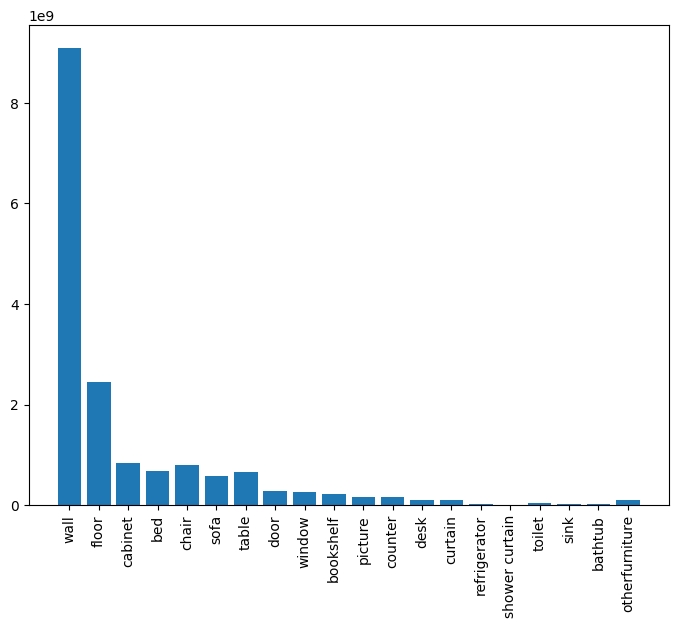

In [55]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation='vertical')
ax.bar(classes[1:],class_vals[1:])
plt.show()

In [56]:
quick_sum = {}
for i, id in enumerate(class_ids):
    quick_sum[id]=class_vals[i]
df = pd.DataFrame(quick_sum.items(), columns=["Class","Values"])
df.loc['Total'] = pd.Series(df['Values'].sum(), index=['Values'])
df['Percentage'] = df['Values']/df['Values'].sum() *200
sorted = df.sort_values(by='Values', ascending=False)
display(sorted)

,Class,Values,Percentage
Total,NaN,2.981507e+10,100.000000
0,0.0,1.328170e+10,44.546938
1,1.0,9.095045e+09,30.504861
2,2.0,2.455271e+09,8.235000
3,3.0,8.381143e+08,2.811043
5,5.0,7.885150e+08,2.644686
4,4.0,6.785740e+08,2.275943
7,7.0,6.547272e+08,2.195961
6,6.0,5.689062e+08,1.908116
8,8.0,2.858319e+08,0.958683


## Indepth class Analysis

### For Different Classes

In [57]:
print("Class 0", load[0]["sum"])
scene_id = list(load[0]["scenes"].keys())[0]
print("Poses", load[0]["scenes"][scene_id]["sum"])

Class 0 13281699495
Poses 76653814


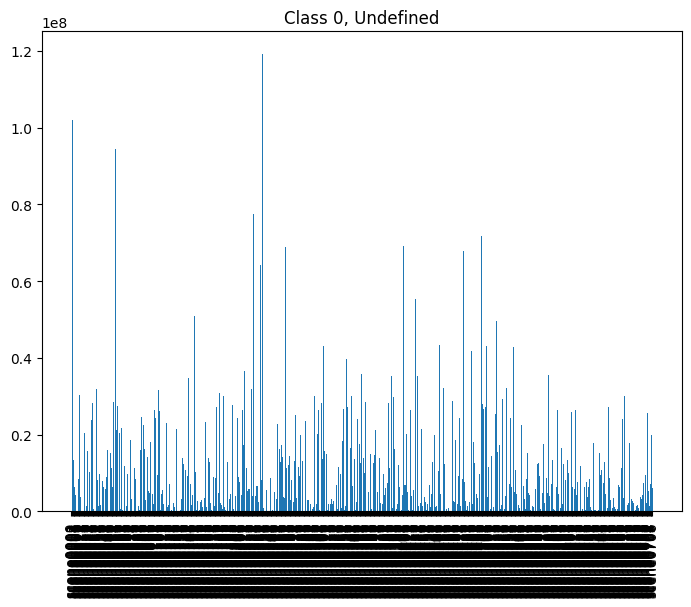

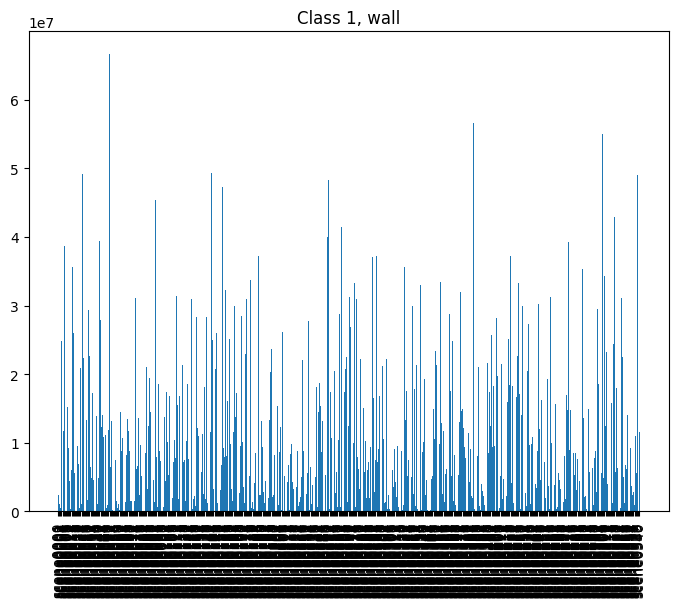

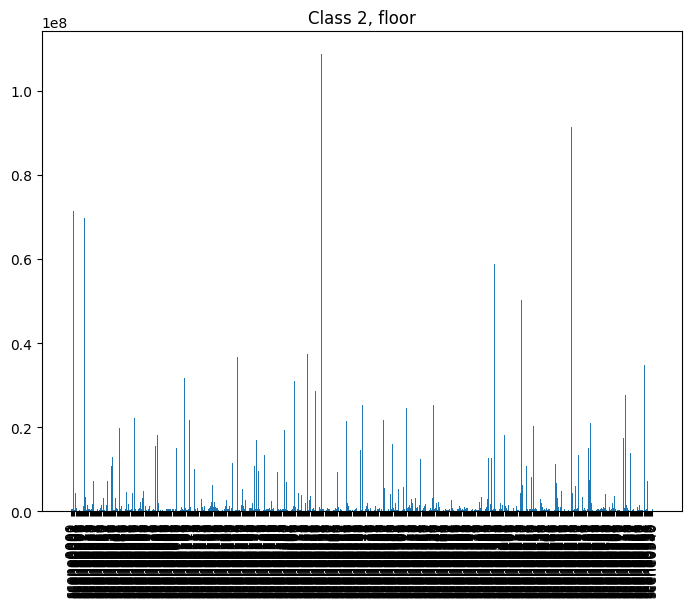

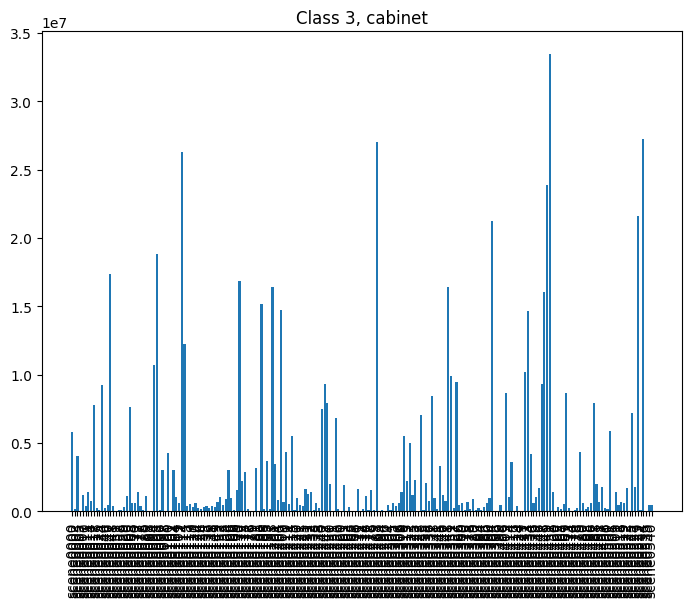

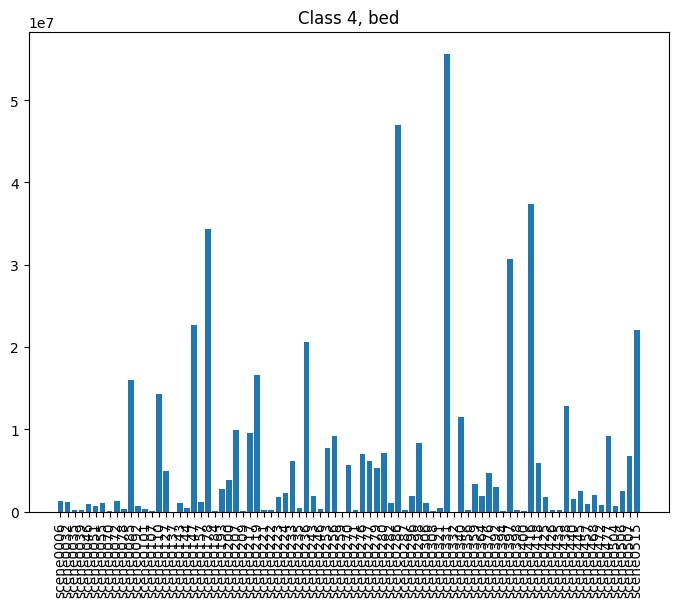

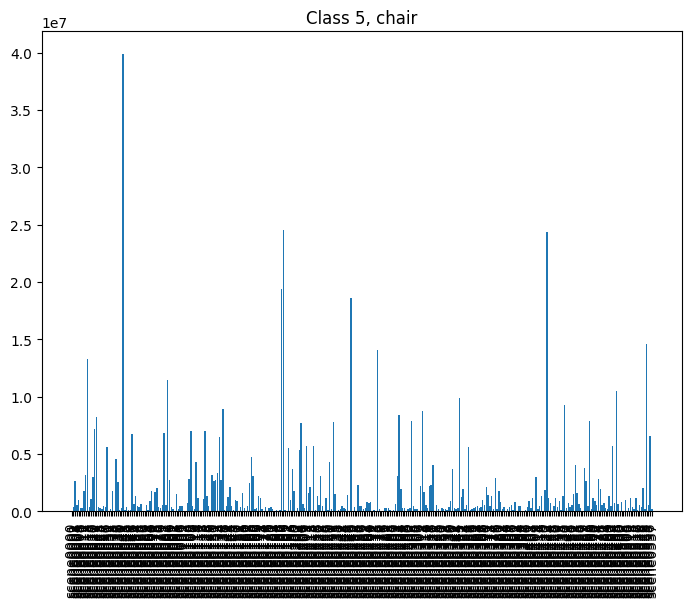

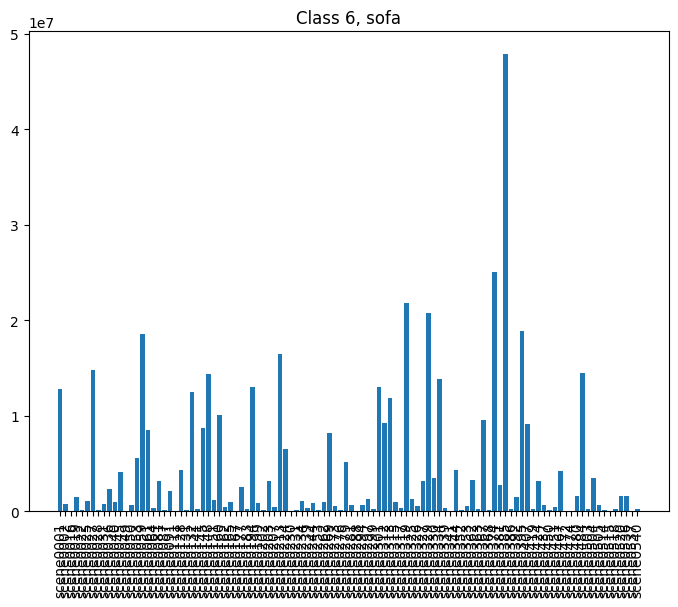

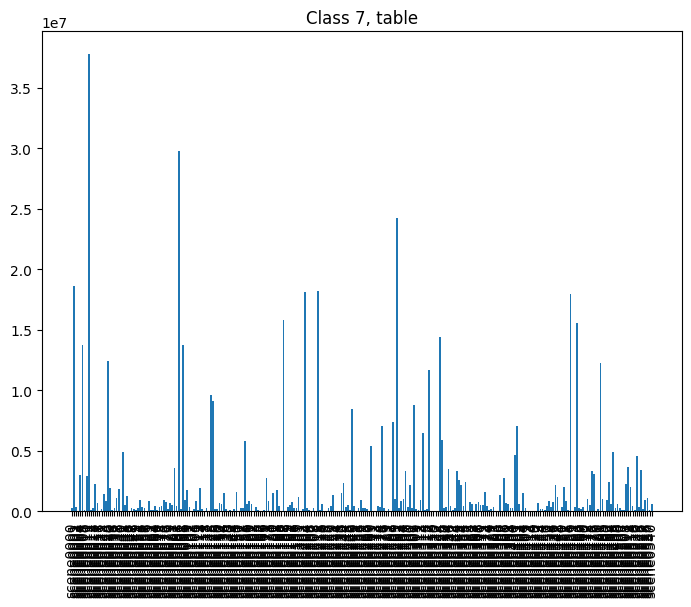

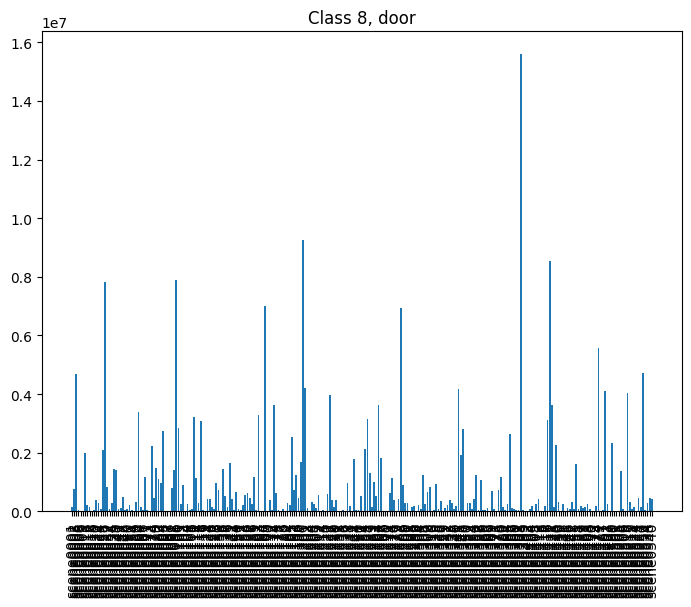

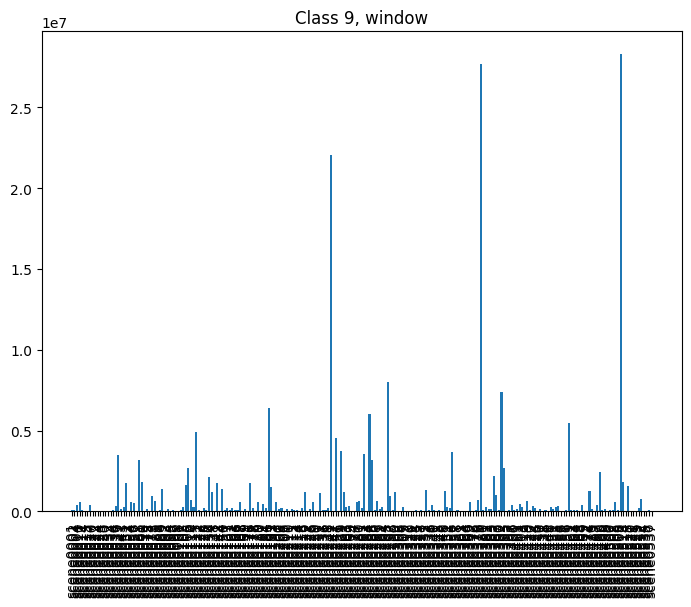

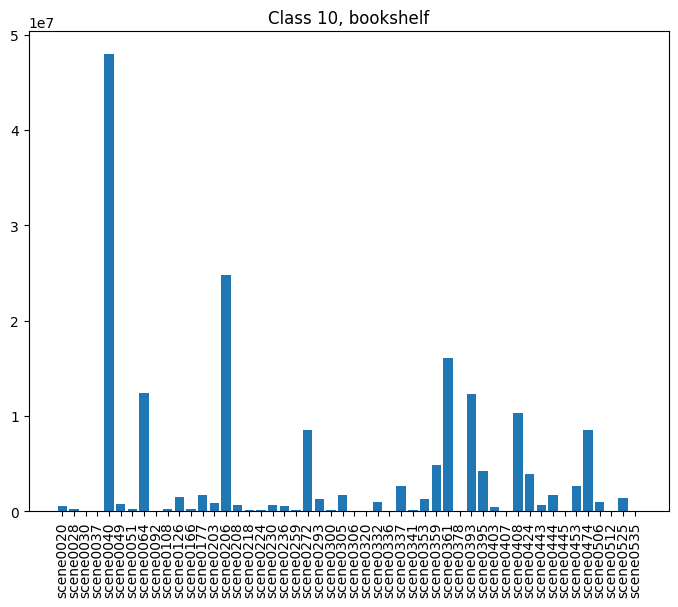

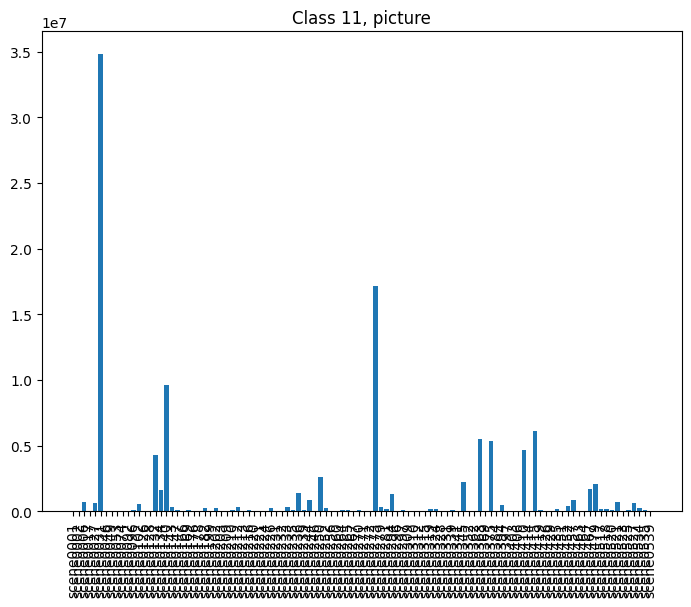

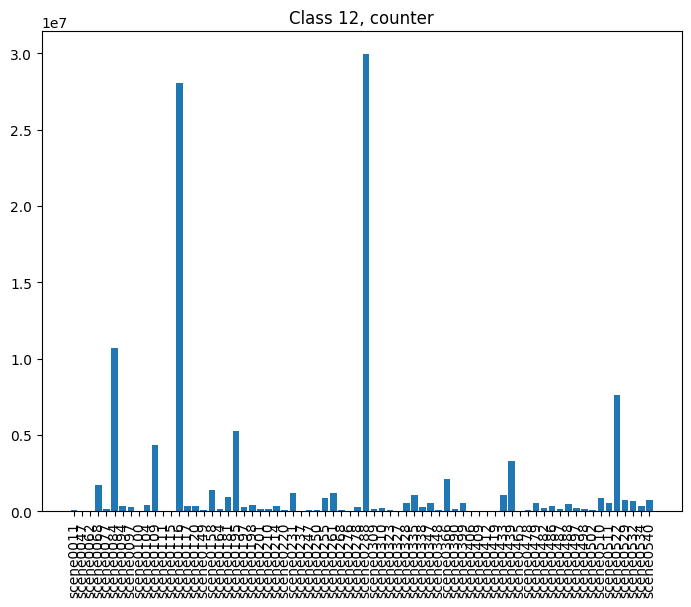

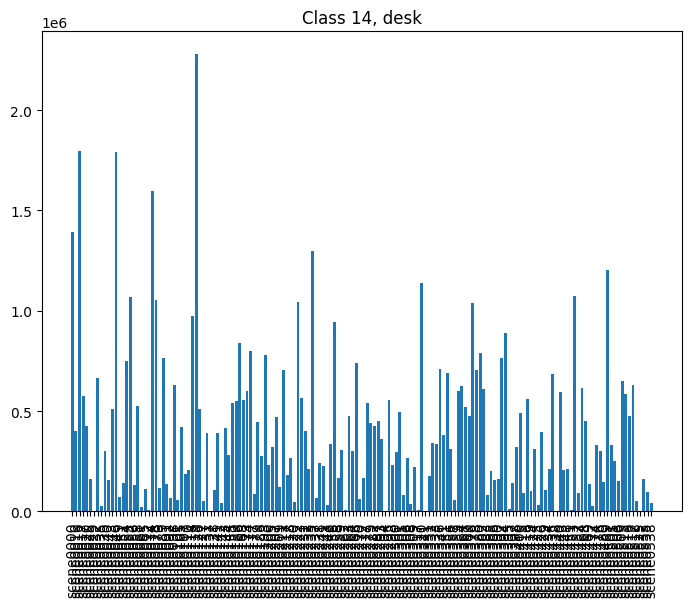

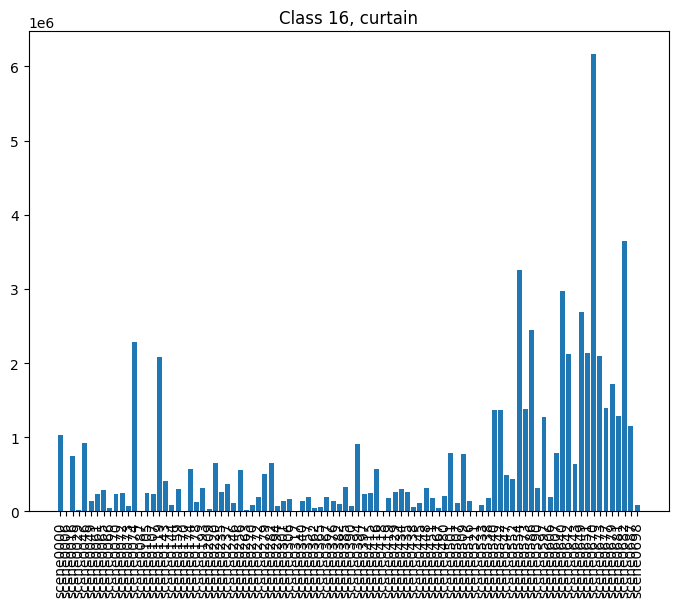

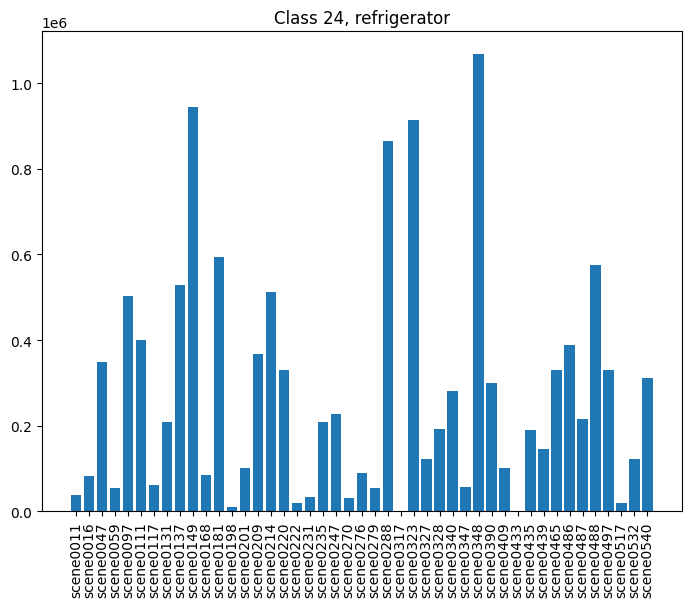

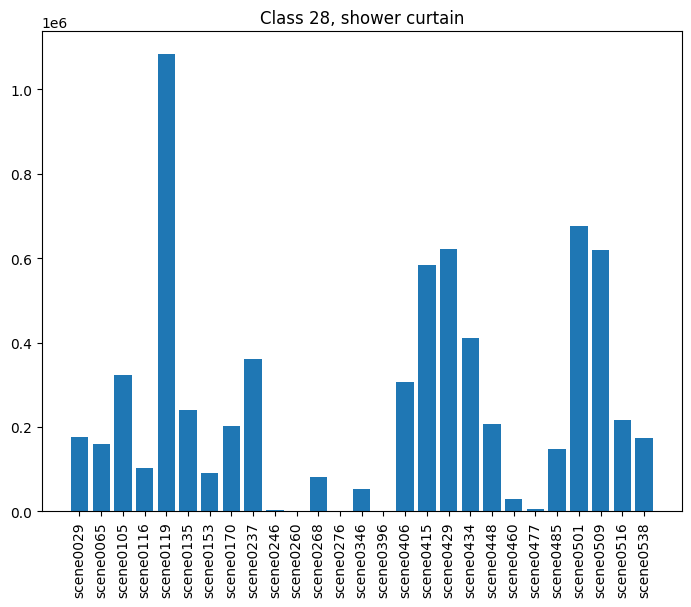

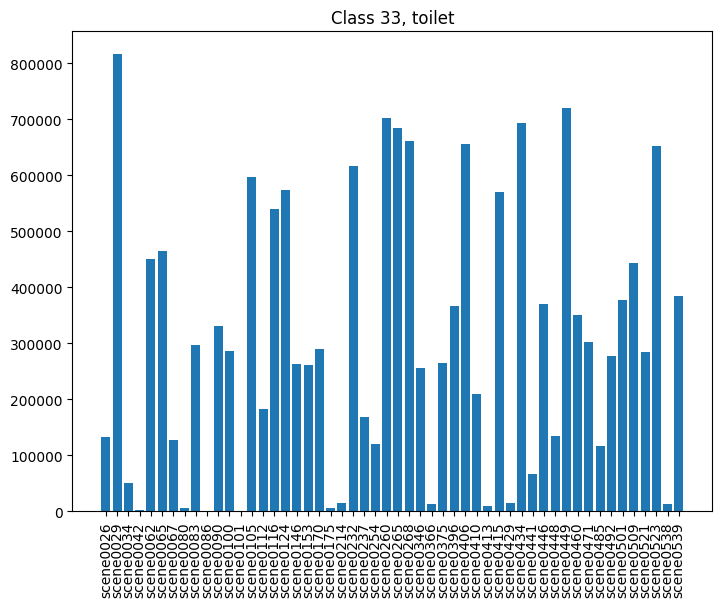

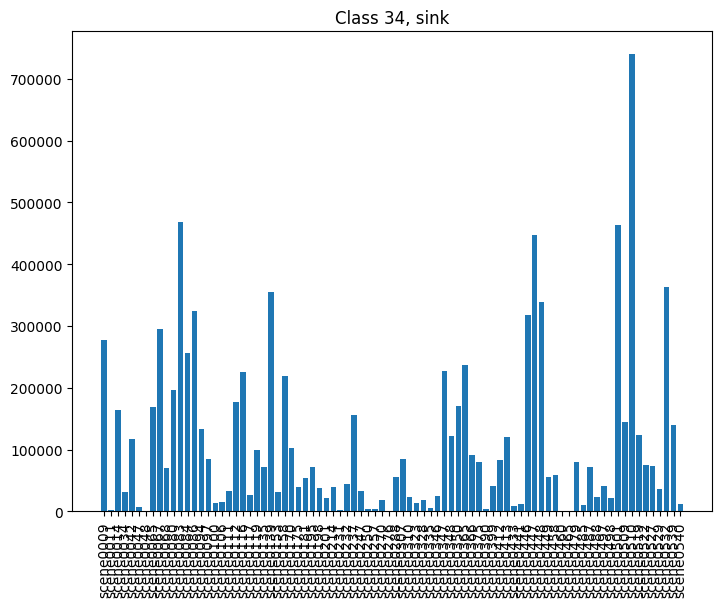

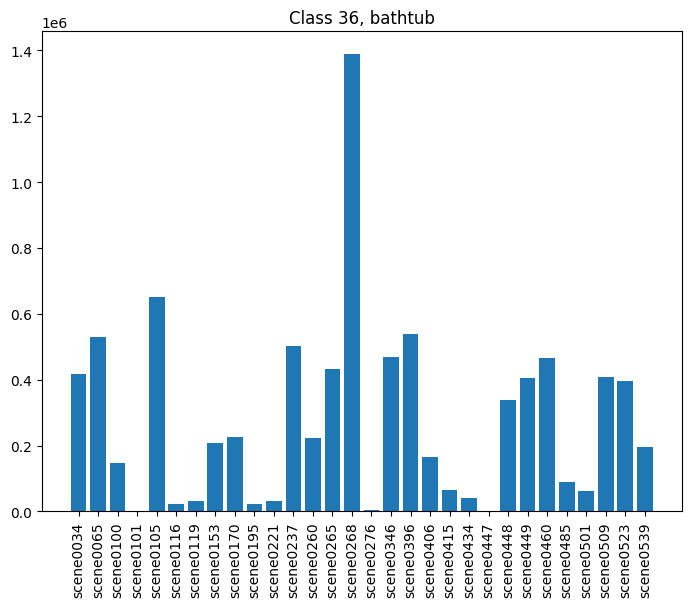

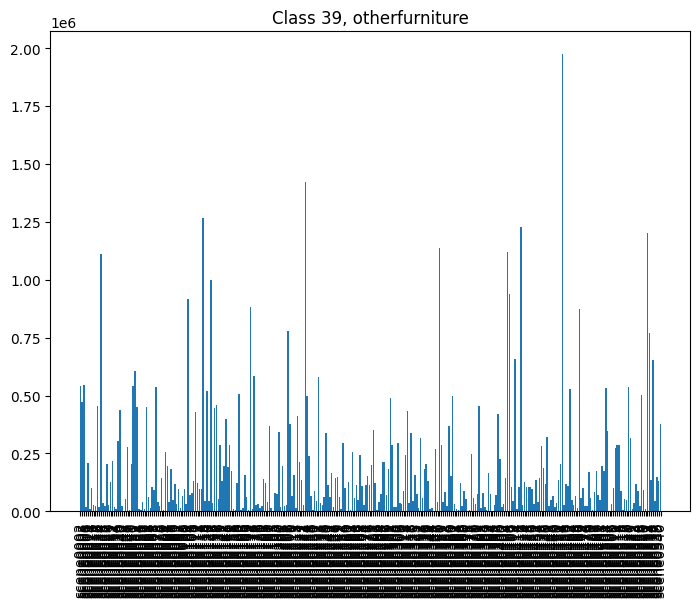

In [58]:
for k_idx, class_key in enumerate(load.keys()):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    poses = list(load[class_key]["scenes"].keys())
    for i, pose in enumerate(poses):
        poses[i] = poses[i].split("_")[-2]
    pose_sums = []
    for pose in list(load[class_key]["scenes"].keys()):
        pose_sums.append(load[class_key]["scenes"][pose]["sum"])
    plt.title(label=f"Class {str(class_key)}, {classes[k_idx]}")
    plt.xticks(rotation='vertical')
    ax.bar(poses,pose_sums)
    plt.show()

## Analysis of the smallest classes

In [61]:
least_4 = sorted.iloc[-4:]
display(least_4)

for Class in least_4['Class']:
    print(Class)
    class_key = int(Class)
    print(load[class_key]['sum']) 
    print("Scenes List:")
    for k in load[class_key]['scenes'].keys():
        print(k,":",load[class_key]['scenes'][k]['sum'])


,Class,Values,Percentage
15,24.0,17006239.0,0.057039
18,34.0,15597983.0,0.052316
19,36.0,13483405.0,0.045223
16,28.0,9424769.0,0.031611


24.0
17006239
Scenes List:
plenoxel_scannet_scene0011_00 : 39106
plenoxel_scannet_scene0011_01 : 5744
plenoxel_scannet_scene0016_00 : 56046
plenoxel_scannet_scene0016_01 : 83247
plenoxel_scannet_scene0047_00 : 347813
plenoxel_scannet_scene0059_01 : 55661
plenoxel_scannet_scene0097_00 : 503959
plenoxel_scannet_scene0111_00 : 399353
plenoxel_scannet_scene0111_01 : 153683
plenoxel_scannet_scene0111_02 : 4282
plenoxel_scannet_scene0117_00 : 62073
plenoxel_scannet_scene0131_00 : 6060
plenoxel_scannet_scene0131_01 : 208063
plenoxel_scannet_scene0137_00 : 527645
plenoxel_scannet_scene0137_01 : 517102
plenoxel_scannet_scene0137_02 : 517552
plenoxel_scannet_scene0149_00 : 943269
plenoxel_scannet_scene0168_00 : 85982
plenoxel_scannet_scene0168_02 : 2267
plenoxel_scannet_scene0181_02 : 436960
plenoxel_scannet_scene0181_03 : 593695
plenoxel_scannet_scene0198_00 : 10431
plenoxel_scannet_scene0201_00 : 101690
plenoxel_scannet_scene0201_01 : 18312
plenoxel_scannet_scene0209_00 : 304436
plenoxel_scann